In [99]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

import matplotlib.pyplot as plt 

import seaborn as sns

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h1> Loading Data

In [2]:
data = pd.read_csv('datasets/news-article-categories_v2.csv')
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

data["content"] = data["title"] + ". " + data["body"]

In [3]:
data_slice = data[:1000]

<h1> TF-IDF

In [93]:
# removing special characters and stop words from the text
stop_words_l=stopwords.words('english')
data_slice['documents_cleaned']=data_slice.content.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split() if re.sub(r'[^a-zA-Z]',' ',w).lower() not in stop_words_l) )

#TF-IDF
tfidfvectoriser=TfidfVectorizer()
tfidfvectoriser.fit(data_slice.documents_cleaned)
tfidf_vectors=tfidfvectoriser.transform(data_slice.documents_cleaned)

#Cosine similarity
pairwise_similarities=np.dot(tfidf_vectors,tfidf_vectors.T).toarray() #pairwise_similarities[i,j] contains the similarity score between doc i and doc j
#Euclidian Distance
pairwise_differences=euclidean_distances(tfidf_vectors)

def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {data_slice.iloc[doc_id]["content"]}')
    print ('\n')
    print ('Similar Documents:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[:-4:-1] #Remove the last one, which is doc i
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])[-3:]
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {data_slice.iloc[ix]["content"][:200]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')

C:\Users\julie\AppData\Local\Temp\ipykernel_20160\2263391397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slice['documents_cleaned']=data_slice.content.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split() if re.sub(r'[^a-zA-Z]',' ',w).lower() not in stop_words_l) )


In [57]:
data_slice.documents_cleaned[0]

'modeling agencies enabled sexual predators years  former agent says  october       carolyn kramer received disturbing phone call  former modeling agent listened intently model used represent told famous french photographer  still shoots top publications  raped     shortly meeting man restaurant       model said blacked drinking one glass champagne  woke bed next morning sore bruised vagina  woman  preferred remain anonymous  confirmed story huffpost  want name photographer fear legal repercussions   he one photographers agents clients young girls basically knew lecherous   kramer said  claiming agents sent models    s anyway    but  didn t realize  at time  raping girls   kramer said broke crying woman relayed story assault   in moment felt let models represented course    years   said   it made feel like  front face didn t anything change  it    it s    years since kramer left fashion business  throughout two decades spent working modeling agent new york city     s     s early     s 

In [58]:
# documents similar to the first document in the corpus
print("----------Cosine Similarity----------")
most_similar(0,pairwise_similarities,'Cosine Similarity')

----------Cosine Similarity----------
Document: Modeling Agencies Enabled Sexual Predators For Years, Former Agent Says. In October 2017, Carolyn Kramer received a disturbing phone call. The former modeling agent listened intently as a model she used to represent told her that a famous French photographer, who still shoots for top publications, raped her when she was 16. Shortly after meeting the man at a restaurant in 1983, the model said she blacked out after drinking one glass of champagne, then woke up in his bed the next morning with a sore and bruised vagina. The woman, who preferred to remain anonymous, confirmed this story with HuffPost, but did not want to name the photographer for fear of legal repercussions. “He was one of the photographers that agents and clients and young girls basically knew was lecherous,” Kramer said, claiming that she and other agents sent their models to him in the ’80s anyway. “[But] what I didn’t realize [at the time] is that he was raping girls.”  

In [59]:
print("\n ----------Euclidian Distance----------")
most_similar(0,pairwise_differences,'Euclidean Distance')


 ----------Euclidian Distance----------
Document: Modeling Agencies Enabled Sexual Predators For Years, Former Agent Says. In October 2017, Carolyn Kramer received a disturbing phone call. The former modeling agent listened intently as a model she used to represent told her that a famous French photographer, who still shoots for top publications, raped her when she was 16. Shortly after meeting the man at a restaurant in 1983, the model said she blacked out after drinking one glass of champagne, then woke up in his bed the next morning with a sore and bruised vagina. The woman, who preferred to remain anonymous, confirmed this story with HuffPost, but did not want to name the photographer for fear of legal repercussions. “He was one of the photographers that agents and clients and young girls basically knew was lecherous,” Kramer said, claiming that she and other agents sent their models to him in the ’80s anyway. “[But] what I didn’t realize [at the time] is that he was raping girls.

In [49]:
data_slice.iloc[0]["documents_cleaned"]

'modeling agencies enabled sexual predators years  former agent says  october       carolyn kramer received disturbing phone call  former modeling agent listened intently model used represent told famous french photographer  still shoots top publications  raped     shortly meeting man restaurant       model said blacked drinking one glass champagne  woke bed next morning sore bruised vagina  woman  preferred remain anonymous  confirmed story huffpost  want name photographer fear legal repercussions   he one photographers agents clients young girls basically knew lecherous   kramer said  claiming agents sent models    s anyway    but  didn t realize  at time  raping girls   kramer said broke crying woman relayed story assault   in moment felt let models represented course    years   said   it made feel like  front face didn t anything change  it    it s    years since kramer left fashion business  throughout two decades spent working modeling agent new york city     s     s early     s 

<h1> Word2vec

In [51]:
data_slice.documents_cleaned[0]

'modeling agencies enabled sexual predators years  former agent says  october       carolyn kramer received disturbing phone call  former modeling agent listened intently model used represent told famous french photographer  still shoots top publications  raped     shortly meeting man restaurant       model said blacked drinking one glass champagne  woke bed next morning sore bruised vagina  woman  preferred remain anonymous  confirmed story huffpost  want name photographer fear legal repercussions   he one photographers agents clients young girls basically knew lecherous   kramer said  claiming agents sent models    s anyway    but  didn t realize  at time  raping girls   kramer said broke crying woman relayed story assault   in moment felt let models represented course    years   said   it made feel like  front face didn t anything change  it    it s    years since kramer left fashion business  throughout two decades spent working modeling agent new york city     s     s early     s 

In [47]:
# tokenize and pad every document to make them of the same size
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

tokenizer=Tokenizer()

tokenizer.fit_on_texts(data_slice.documents_cleaned) #updates internal vocabulary based on corpus

tokenized_documents=tokenizer.texts_to_sequences(data_slice.documents_cleaned) #tokenization
tokenized_paded_documents=pad_sequences(tokenized_documents,maxlen=64,padding='post') #Padding

vocab_size=len(tokenizer.word_index)+1
print (tokenized_paded_documents[0])

[  753  4457   790   344  6970   291  1590    73    15   412  5147   732
    42    44  2287    92  1029   504  2602     3  1817    41  6969    70
  1591    79   504    35   461  1268 24109    59   603   452    16   111
  2603  4272   399  1641  1821 17996    13   597   504     8    83   361
   235  5726   110   529    49  1899  3177    31    83     6   573  1173
 14807 24110   228   221]


In [44]:
# loading pre-trained embeddings, each word is represented as a 300 dimensional vector
import gensim

W2V_PATH="../../GoogleNews-vectors-negative300.bin.gz"
model_w2v = gensim.models.KeyedVectors.load_word2vec_format(W2V_PATH, binary=True)

In [48]:
# creating embedding matrix, every row is a vector representation from the vocabulary indexed by the tokenizer index. 
embedding_matrix=np.zeros((vocab_size,300))
print(embedding_matrix.shape)

for word,i in tokenizer.word_index.items():
    if word in model_w2v:
        embedding_matrix[i]=model_w2v[word]
        
# creating document-word embeddings
document_word_embeddings=np.zeros((len(tokenized_paded_documents),64,300))
for i in range(len(tokenized_paded_documents)):
    for j in range(len(tokenized_paded_documents[0])):
        document_word_embeddings[i][j]=embedding_matrix[tokenized_paded_documents[i][j]]
        
document_word_embeddings.shape

(39549, 300)


(1000, 64, 300)

In [39]:
embedding_matrix.shape

(39549, 300)

In [40]:
tfidf_vectors.shape

(1000, 39522)

In [75]:
# calculating average of word vectors of a document weighted by tf-idf
document_embeddings=np.zeros((len(tokenized_paded_documents),300))
words=tfidfvectoriser.get_feature_names()

print(len(document_word_embeddings))
print(len(words))
print(words[100])
print(tokenizer.word_index[words[100]])
print("shape1",embedding_matrix[tokenizer.word_index[words[39395]]].shape)
print("shape2",tfidf_vectors[0][0].shape)
print(len(document_embeddings))
print(len(embedding_matrix[39395].shape))

1000
39522
absolves
39395
shape1 (300,)
shape2 (1, 39522)
1000
1


In [ ]:
for i in range(len(document_word_embeddings)):
    for j in range(len(words)):
        document_embeddings[i]+=embedding_matrix[tokenizer.word_index[words[j]]]*tfidf_vectors[i][j]
        
print (document_embeddings.shape)
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)
most_similar(0,pairwise_similarities,'Cosine Similarity')
most_similar(0,pairwise_differences,'Euclidean Distance')

<h1>GloVe

In [77]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(data_slice.documents_cleaned)
tokenized_documents=tokenizer.texts_to_sequences(data_slice.documents_cleaned)
tokenized_paded_documents=pad_sequences(tokenized_documents,maxlen=64,padding='post')
vocab_size=len(tokenizer.word_index)+1

# reading Glove word embeddings into a dictionary with "word" as key and values as word vectors
embeddings_index = dict()

with open('glove.6B.100d.txt') as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    
# creating embedding matrix, every row is a vector representation from the vocabulary indexed by the tokenizer index. 
embedding_matrix=np.zeros((vocab_size,100))

for word,i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
# calculating average of word vectors of a document weighted by tf-idf
document_embeddings=np.zeros((len(tokenized_paded_documents),100))
words=tfidfvectoriser.get_feature_names()

# instead of creating document-word embeddings, directly creating document embeddings
for i in range(data_slice.shape[0]):
    for j in range(len(words)):
        document_embeddings[i]+=embedding_matrix[tokenizer.word_index[words[j]]]*tfidf_vectors[i][j]
        

pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.100d.txt'

<h1> Doc2Vec

In [78]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(data_slice.documents_cleaned)]
model_d2v = Doc2Vec(vector_size=100,alpha=0.025, min_count=1)
  
model_d2v.build_vocab(tagged_data)

for epoch in range(100):
    model_d2v.train(tagged_data,
                total_examples=model_d2v.corpus_count,
                epochs=model_d2v.epochs)
    
document_embeddings=np.zeros((data_slice.shape[0],100))

for i in range(len(document_embeddings)):
    document_embeddings[i]=model_d2v.docvecs[i]
    
    
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

most_similar(0,pairwise_similarities,'Cosine Similarity')
most_similar(0,pairwise_differences,'Euclidean Distance')

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Document: Modeling Agencies Enabled Sexual Predators For Years, Former Agent Says. In October 2017, Carolyn Kramer received a disturbing phone call. The former modeling agent listened intently as a model she used to represent told her that a famous French photographer, who still shoots for top publications, raped her when she was 16. Shortly after meeting the man at a restaurant in 1983, the model said she blacked out after drinking one glass of champagne, then woke up in his bed the next morning with a sore and bruised vagina. The woman, who preferred to remain anonymous, confirmed this story with HuffPost, but did not want to name the photographer for fear of legal repercussions. “He was one of the photographers that agents and clients and young girls basically knew was lecherous,” Kramer said, claiming that she and other agents sent their models to him in the ’80s anyway. “[But] what I didn’t realize [at the time] is that he was raping girls.”  Kramer said she broke down crying afte

C:\Users\julie\AppData\Local\Temp\ipykernel_20160\1280916197.py:19: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  document_embeddings[i]=model_d2v.docvecs[i]


<h1> BERT

In [79]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

document_embeddings = sbert_model.encode(data_slice['documents_cleaned'])

pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

most_similar(0,pairwise_similarities,'Cosine Similarity')
most_similar(0,pairwise_differences,'Euclidean Distance')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Document: Modeling Agencies Enabled Sexual Predators For Years, Former Agent Says. In October 2017, Carolyn Kramer received a disturbing phone call. The former modeling agent listened intently as a model she used to represent told her that a famous French photographer, who still shoots for top publications, raped her when she was 16. Shortly after meeting the man at a restaurant in 1983, the model said she blacked out after drinking one glass of champagne, then woke up in his bed the next morning with a sore and bruised vagina. The woman, who preferred to remain anonymous, confirmed this story with HuffPost, but did not want to name the photographer for fear of legal repercussions. “He was one of the photographers that agents and clients and young girls basically knew was lecherous,” Kramer said, claiming that she and other agents sent their models to him in the ’80s anyway. “[But] what I didn’t realize [at the time] is that he was raping girls.”  Kramer said she broke down crying afte

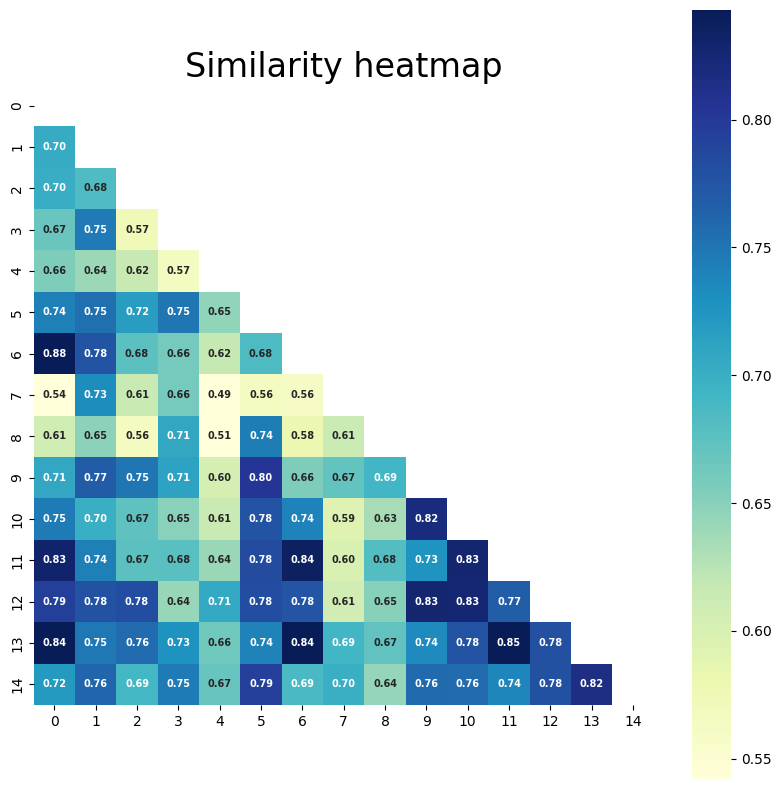

In [104]:
data_slice2 = data_slice[:15]
document_embeddings2 = sbert_model.encode(data_slice2['documents_cleaned'])

similarities2=cosine_similarity(document_embeddings2)

labels = data_slice2.index

similarity_df = pd.DataFrame(similarities2, columns=labels, index=labels) 
mask = np.triu(np.ones_like(similarity_df)) # we apply a mask to remove the top of the heatmap

# let's create the viz
plt.figure(figsize=(10, 10))
sns.heatmap(
			similarity_df,
			square=True, 
			annot=True, 
			robust=True,
			fmt='.2f',
			annot_kws={'size': 7, 'fontweight': 'bold'},
			yticklabels=similarity_df.columns,
			xticklabels=similarity_df.columns,
			cmap="YlGnBu",
			mask=mask
)

plt.title('Similarity heatmap', fontdict={'fontsize': 24})
plt.show()

In [105]:
print(data_slice2.body.iloc[6])
print(data_slice2.body.iloc[0])

Multiple women have accused Broadway star Ben Vereen of sexual misconduct ranging from harassment to assault, according to a Friday morning report from the New York Daily News. The alleged sexual misconduct happened during Vereen’s tenure as director of the 2015 production of “Hair” at the Venice Theatre program outside of Tampa, Florida. Vereen, who was 69 at the time, held open auditions for the production and later managed the 32-person volunteer cast. Four female cast members told the New York Daily News that Vereen repeatedly and forcibly kissed and hugged them without their consent. Several other cast members corroborated their experiences, telling the New York Daily News that Vereen routinely made degrading comments about female cast members’ bodies during rehearsals and one time stripped naked with the cast during what he called an acting exercise.  Two of the four women alleged that Vereen invited them separately over to his home in September 2015 for “private rehearsals.” Dur

In [107]:
print(data_slice2.content.iloc[11])
print(data_slice2.content.iloc[13])

'Dick Van Dyke' Cast Member Rose Marie Dead At 94. Actress Rose Marie, who rose to national fame in the 1960s playing wisecracking Sally Rogers on “The Dick Van Dyke Show,” died Thursday at her home in Los Angeles. She was 94. Though the actress was best known for playing Sally Rogers, her show business career goes back 90 years, starting when she was a child singer performing under the name Baby Rose Marie. Born Rose Marie Mazetta, she was known as “the child wonder.” She starred on her NBC radio show at age 5, and played opposite W.C. Fields in the 1933 film “International House,” according to Variety. It wasn’t an easy life. In her 2002 autobiography Hold The Roses, the performer described her family in harsh terms: I was raised by a mother who was a naïve, Polish lady who believed everything she was told. My father was a tyrant who had another family and never married my mother. He gambled away all the money I made as a child and my mother never knew a thing about it. He beat me be

<h2>BERT Test

In [80]:
text1 = "DUBLIN — Lawmakers elected Leo Varadkar as Ireland’s prime minister for a second time Saturday in agreed succession to Micheál Martin as the government partners vowed to defend the center ground of Irish politics against the nationalists of Sinn Féin. “The distinguishing feature of centrist democrats is the ability to respect differences, find points of agreement, and cooperate. This is what we have done,” Martin said as he backed Varadkar’s nomination as Taoiseach, a core commitment in their coalition pact struck in 2020. Under terms of that agreement, the nearly century-old rivals of Irish politics — Martin’s Fianna Fáil and Varadkar’s Fine Gael – formed their first joint government with support from a junior coalition partner, the Green Party. All three agreed that Martin would lead for the first 2 ½ years, Varadkar for the rest of an expected five-year administration."

In [81]:
text2 = "When two major political parties came together after Ireland's election in 2020, they agreed to share the role of taoiseach, or prime minister. After two-and-a-half years, Micheal Martin steps down and Varadkar returns.Leo Varadkar returned as taoiseach, or prime minister, of Ireland on Saturday, replacing Micheal Martin as part of an unconventional coalition deal struck more than two years ago. Varadkar's nomination was approved by lawmakers during a special session of the Dail, the lower house of parliament. Varadkar later received the seal of office from President Michael D. Higgins."

In [82]:
text3 = "Actor Kevin Spacey is to be charged with seven further sex offences in the UK, in addition to those he is already due to stand trial for in June next year.All the charges relate to one man. Britain's Crown Prosecution said that charges against the former House of Cards star are three of indecent assault, three of sexual assault and one of causing a person to engage in sexual activity without consent. The charges relate to incidents between 2001 and 2004. "

In [83]:
text4 = "In October, Kevin Spacey testified in a New York court where he faced a civil trial related to sexual-assault allegations levied against him by the actor Anthony Rapp. In 2017, Rapp alleged that Spacey — who was starring in Netflix’s House of Cards at the time — had sexually assaulted him when he was 14. Since then, over 30 men have come forward with accusations ranging from nonconsensual groping to the attempted rape of minors. Spacey, 62, initially responded to Rapp’s allegations with a muddled apology note in which he came out as gay (a deflection many criticized as conflating homosexuality and pedophilia) and claimed not to remember the incident, writing on Twitter, “If I did behave then as he describes, I owe him the sincerest apology for what would have been deeply inappropriate drunken behavior, and I am sorry for the feelings he describes having carried with him all these years.” Following the initial wave of allegations, Spacey was dropped by his talent agency and publicist, fired from House of Cards, and scrubbed from film projects. He retreated from public life, with a representative telling Variety he was seeking “evaluation and treatment,” though he has occasionally resurfaced over the years to launch film comebacks and post bizarre defenses on YouTube and Twitter."

In [84]:
text_list = [text1, text2, text3, text4]

In [90]:
#Preprocessing
text_df = pd.Series(text_list)
text_df=text_df.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split() if re.sub(r'[^a-zA-Z]',' ',w).lower() not in stop_words_l) )

In [91]:
text_df

0    dublin   lawmakers elected leo varadkar irelan...
1    two major political parties came together irel...
2    actor kevin spacey charged seven sex offences ...
3    october  kevin spacey testified new york court...
dtype: object

In [95]:
#TF-IDF
test_tfidfvectoriser=TfidfVectorizer()
test_tfidfvectoriser.fit(text_df)
test_tfidf_vectors=test_tfidfvectoriser.transform(text_df)

#Cosine similarity
pairwise_similarities=np.dot(test_tfidf_vectors,test_tfidf_vectors.T).toarray() #pairwise_similarities[i,j] contains the similarity score between doc i and doc j
#Euclidian Distance
pairwise_differences=euclidean_distances(test_tfidf_vectors)

def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {text_df.iloc[doc_id]}')
    print ('\n')
    print ('Similar Documents:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[:-4:-1] #Remove the last one, which is doc i
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])[-3:]
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {text_df.iloc[ix]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')

In [96]:
test_embeddings = sbert_model.encode(text_df)

test_cosine=cosine_similarity(test_embeddings)
test_euclidian=euclidean_distances(test_embeddings)

most_similar(0,test_cosine,'Cosine Similarity')
most_similar(0,test_euclidian,'Euclidean Distance')

Document: dublin   lawmakers elected leo varadkar ireland s prime minister second time saturday agreed succession miche l martin government partners vowed defend center ground irish politics nationalists sinn f in   the distinguishing feature centrist democrats ability respect differences  find points agreement  cooperate  done   martin said backed varadkar s nomination taoiseach  core commitment coalition pact struck       terms agreement  nearly century old rivals irish politics   martin s fianna f il varadkar s fine gael   formed first joint government support junior coalition partner  green party  three agreed martin would lead first     years  varadkar rest expected five year administration 


Similar Documents:


Document: two major political parties came together ireland s election       agreed share role taoiseach  prime minister  two and a half years  micheal martin steps varadkar returns leo varadkar returned taoiseach  prime minister  ireland saturday  replacing micheal mart

In [97]:
most_similar(2,test_cosine,'Cosine Similarity')
most_similar(2,test_euclidian,'Euclidean Distance')

Document: actor kevin spacey charged seven sex offences uk  addition already due stand trial june next year all charges relate one man  britain s crown prosecution said charges former house cards star three indecent assault  three sexual assault one causing person engage sexual activity without consent  charges relate incidents           


Similar Documents:


Document: october  kevin spacey testified new york court faced civil trial related sexual assault allegations levied actor anthony rapp        rapp alleged spacey   starring netflix s house cards time   sexually assaulted     since then     men come forward accusations ranging nonconsensual groping attempted rape minors  spacey      initially responded rapp s allegations muddled apology note came gay  a deflection many criticized conflating homosexuality pedophilia  claimed remember incident  writing twitter   if behave describes  owe sincerest apology would deeply inappropriate drunken behavior  sorry feelings describes carried